In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8')
sns.set_theme()

In [3]:
# Read the CSV files
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Display basic information about the datasets
print("Dataset Shapes:")
print(f"Customers: {customers_df.shape}")
print(f"Products: {products_df.shape}")
print(f"Transactions: {transactions_df.shape}")

# Display first few rows of each dataset
print("\nCustomers Preview:")
display(customers_df.head())

print("\nProducts Preview:")
display(products_df.head())

print("\nTransactions Preview:")
display(transactions_df.head())

Dataset Shapes:
Customers: (200, 4)
Products: (100, 4)
Transactions: (1000, 7)

Customers Preview:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



Products Preview:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



Transactions Preview:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [4]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')

In [5]:
transactions_df['Month']

0      2024-08
1      2024-05
2      2024-04
3      2024-03
4      2024-03
        ...   
995    2024-10
996    2024-06
997    2024-04
998    2024-09
999    2024-04
Name: Month, Length: 1000, dtype: period[M]

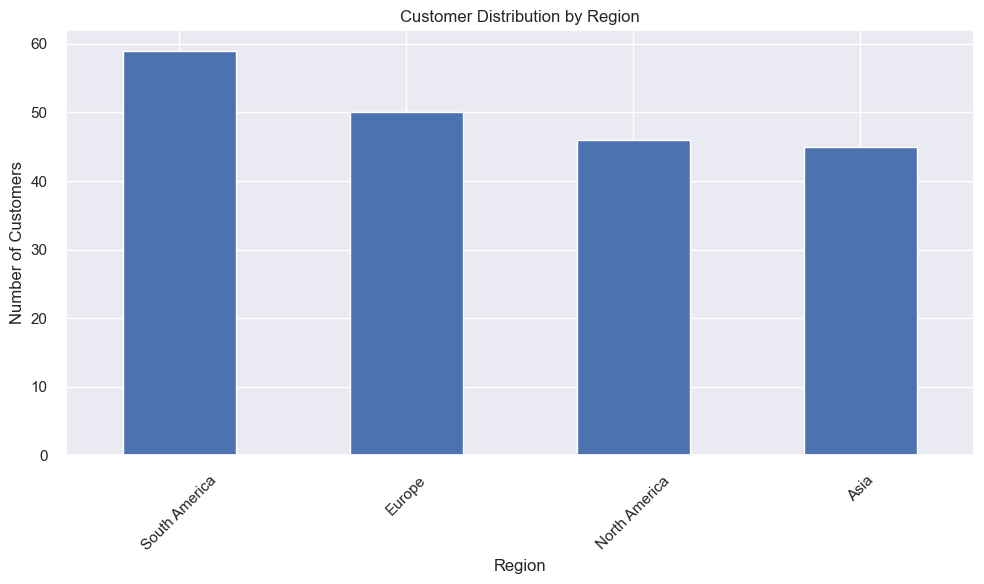

SignupYear,2022,2023,2024
Region,,,
Asia,13,16,16
Europe,16,19,15
North America,10,8,28
South America,25,14,20


In [6]:
# Regional distribution of customers
plt.figure(figsize=(10, 6))
regional_dist = customers_df['Region'].value_counts()
regional_dist.plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate regional growth
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
regional_growth = customers_df.pivot_table(
    index='Region',
    columns='SignupYear',
    values='CustomerID',
    aggfunc='count',
    fill_value=0
)
display(regional_growth)

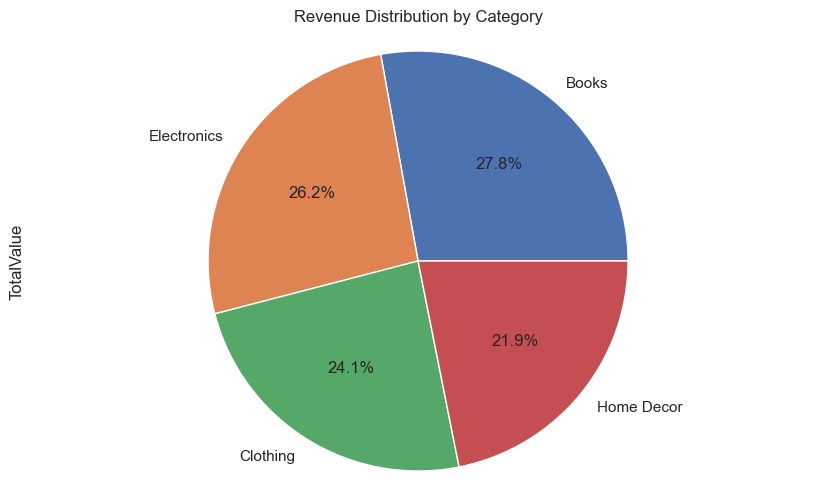

In [7]:
# Category-wise metrics
category_metrics = products_df.groupby('Category').agg({
    'ProductID': 'count',
    'Price': ['mean', 'sum']
}).round(2)

category_revenue = pd.merge(transactions_df, products_df[['ProductID', 'Category']], on='ProductID')
category_revenue = category_revenue.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Visualize category revenue
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue Distribution by Category')
plt.axis('equal')
plt.show()

In [8]:
category_metrics

ProductID   Price         
                count    mean      sum
Category                              
Books              26  292.21  7597.52
Clothing           25  263.72  6593.00
Electronics        26  275.35  7159.19
Home Decor         23  235.02  5405.46

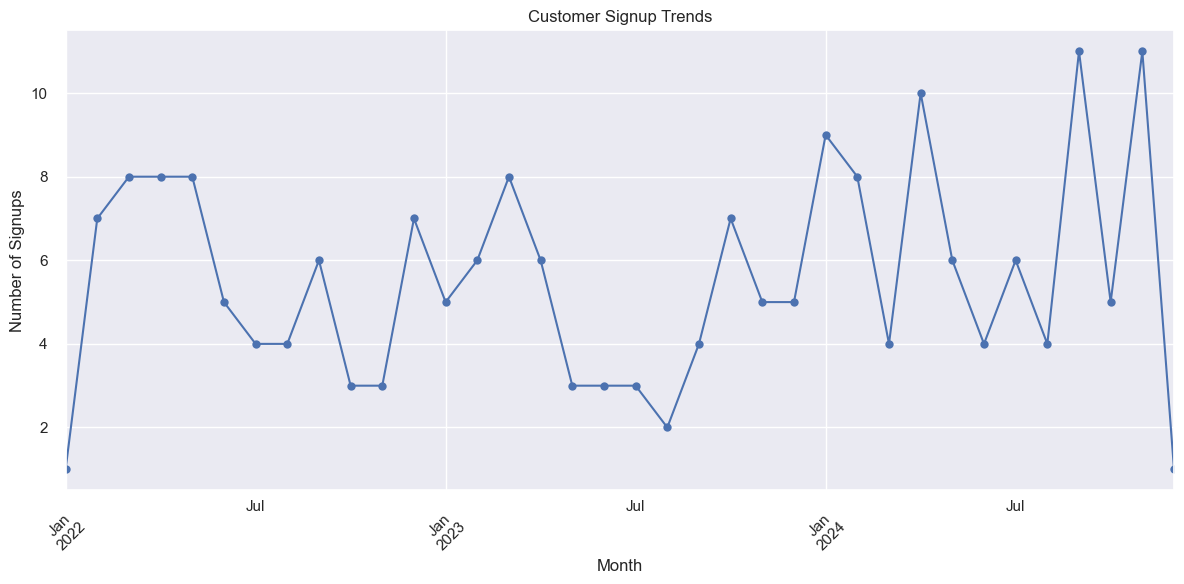

,Signups,YoY Growth %
SignupYear,,
2022,64,NaN
2023,57,-10.937500
2024,79,38.596491


In [9]:
# Monthly signup trends
monthly_signups = customers_df.groupby('SignupMonth').size()

plt.figure(figsize=(12, 6))
monthly_signups.plot(kind='line', marker='o')
plt.title('Customer Signup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

yearly_signups = customers_df.groupby('SignupYear').size()
yoy_growth = yearly_signups.pct_change() * 100
display(pd.DataFrame({'Signups': yearly_signups, 'YoY Growth %': yoy_growth}))

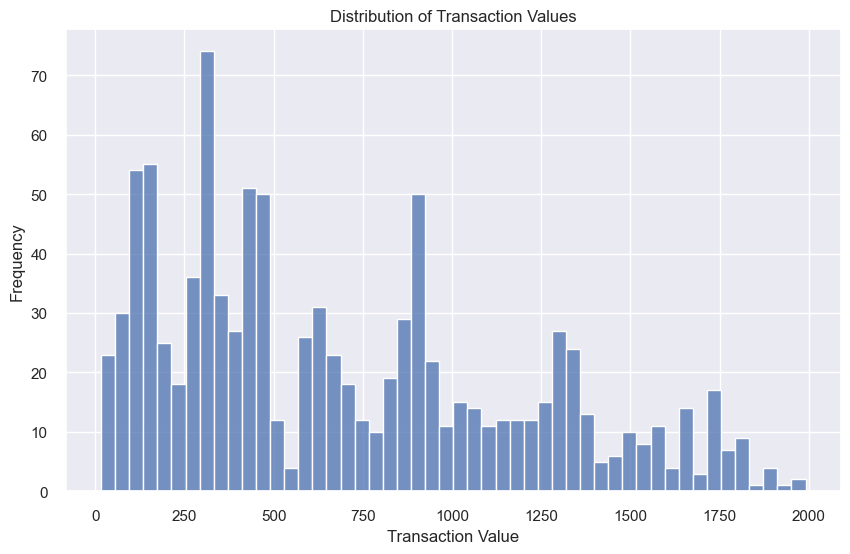

Category
Electronics    143
Books          135
Clothing       126
Home Decor     119
Name: count, dtype: int64

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=transactions_df, x='TotalValue', bins=50)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()

high_value_txns = transactions_df[transactions_df['TotalValue'] >= 500]
high_value_products = pd.merge(high_value_txns, products_df, on='ProductID')
high_value_category = high_value_products['Category'].value_counts()
display(high_value_category)

In [11]:
customer_categories = pd.merge(transactions_df, products_df[['ProductID', 'Category']], on='ProductID')
customer_categories = customer_categories.groupby('CustomerID')['Category'].nunique()

category_impact = pd.DataFrame({
    'Num_Categories': customer_categories,
    'Total_Spend': transactions_df.groupby('CustomerID')['TotalValue'].sum()
})
avg_spend_by_categories = category_impact.groupby('Num_Categories')['Total_Spend'].mean()
display(avg_spend_by_categories)

Num_Categories
1    1204.067222
2    2600.800784
3    3573.436027
4    4821.415439
Name: Total_Spend, dtype: float64

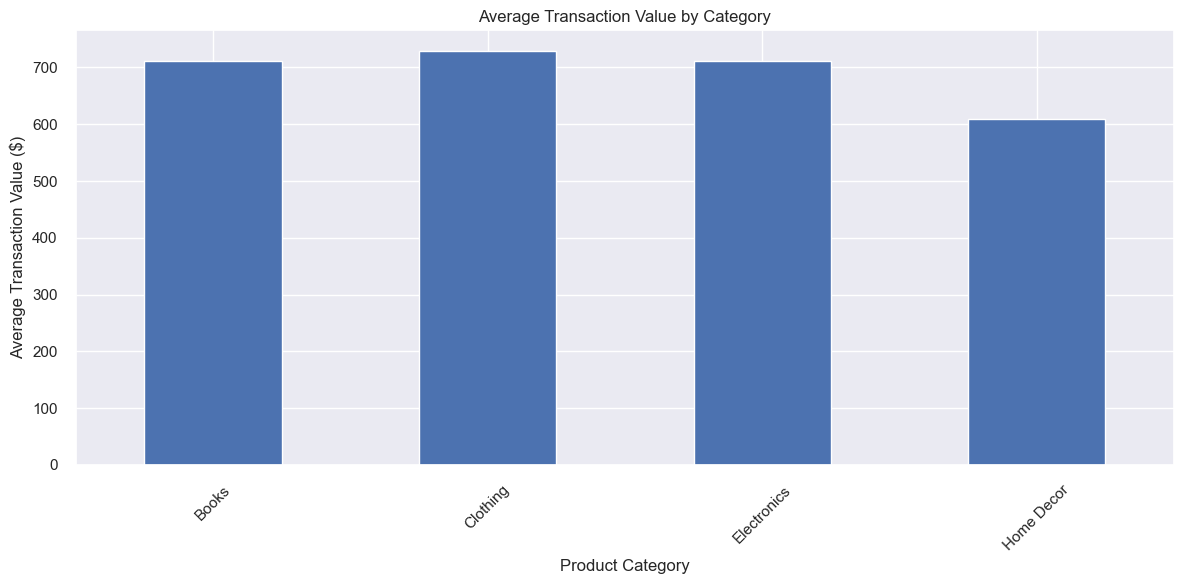


Detailed Category Metrics:


,Avg_Transaction_Value,Transaction_Count,Avg_Quantity
Category,,,
Books,711.66,270,2.52
Clothing,728.82,228,2.59
Electronics,711.75,254,2.47
Home Decor,608.44,248,2.58


In [13]:
# Analyze customer purchase patterns across categories
# Merge transactions with products
customer_category = pd.merge(transactions_df, products_df[['ProductID', 'Category']], on='ProductID')

# Calculate average transaction value by category
avg_transaction_by_category = customer_category.groupby('Category').agg({
    'TotalValue': ['mean', 'count'],
    'Quantity': 'mean'
}).round(2)

avg_transaction_by_category.columns = ['Avg_Transaction_Value', 'Transaction_Count', 'Avg_Quantity']

# Create a bar plot
plt.figure(figsize=(12, 6))
avg_transaction_by_category['Avg_Transaction_Value'].plot(kind='bar')
plt.title('Average Transaction Value by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Transaction Value ($)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Display detailed metrics
print("\nDetailed Category Metrics:")
display(avg_transaction_by_category)